<a href="https://colab.research.google.com/github/on-kulyashov/Code-for-NMR-course/blob/main/Home_Work_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

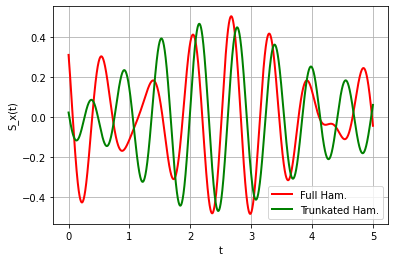

In [ ]:
import numpy as np
from scipy.linalg import schur
import matplotlib.pyplot as plt


# initial spin generation
def init_spins(num=2):
    s_0 = np.sqrt(3)/2
    spins = []
    def one_spin():
        phi_0 = np.random.uniform(0, 2*np.pi)
        p = np.random.uniform()
        s_x = (np.sqrt(40*p + 81) - 10)
        return [s_x, np.sqrt(1 - s_x**2)*np.cos(phi_0), np.sqrt(1 - s_x**2)*np.sin(phi_0)]
    for i in range(num):
        spins.extend(one_spin())
    return s_0 * np.array(spins)


# RK4 method    
def yn1(f, yn, xn, h):
    k1 = f(xn, yn)
    k2 = f(xn + h/2, yn + h*k1/2)
    k3 = f(xn + h/2, yn + h*k2/2)
    k4 = f(xn + h, yn + h*k3)
    return yn + h/6 * (k1 + 2*k2 + 2*k3 + k4)


def integrate(f, a, b, y_a, h):
    sol = [y_a]
    for i in range(int((b-a)//h) + 1):
        sol.append(yn1(f, sol[-1], a + i*h, h))
    return sol

# evolution operators
H = np.array([0, 0, 10])
J_y = -1
J_z = 1

def full_classical(t, s):
    s1 = s[0:3]
    s2 = s[3:6]
    h1 = -np.array([0, J_y*s2[1], J_z*s2[2]])
    h2 = -np.array([0, J_y*s1[1], J_z*s1[2]])
    evol1 = list(np.cross(s1, H + h1))
    evol2 = list(np.cross(s2, H + h2))
    evol1.extend(evol2)
    return np.array(evol1)


def trunk_classical(t, s):
    s1 = s[0:3]
    s2 = s[3:6]
    h1 = -np.array([J_y*s2[0], J_y*s2[1], 2*J_z*s2[2]]) / 2
    h2 = -np.array([J_y*s1[0], J_y*s1[1], 2*J_z*s1[2]]) / 2
    evol1 = list(np.cross(s1, H + h1))
    evol2 = list(np.cross(s2, H + h2))
    evol1.extend(evol2)
    return np.array(evol1)


a, b, ensemble = 0, 5, 10
h = 0.001
points = int((b-a)/h) + 1

def evolution_average(evol_operator, num=ensemble):
    s_x_sum = []
    for i in range(num):
        s_evol = integrate(evol_operator, 0, 5, init_spins(), h)
        s_x_sum.append([s_t[0] + s_t[3] for s_t in s_evol])
    return np.average(np.array(s_x_sum), axis=0)    


s_full = evolution_average(full_classical)
s_trunk = evolution_average(trunk_classical)
t = np.linspace(a, b, num=points)
plt.plot(t, s_full, 'r-', linewidth=2.0)
plt.plot(t, s_trunk, 'g-', linewidth=2.0)
plt.xlabel("t")
plt.ylabel("S_x(t)")
plt.legend(["Full Ham.", "Trunkated Ham."])
plt.grid()
plt.show()